<a href="https://colab.research.google.com/github/raulbenitez/postgrau_IML_exploratory/blob/master/load_csv_github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cargar datos de un csv que está en un repositorio github:

Datos sobre evolución del coronavirus extraídos del repositorio https://github.com/datadista/datasets.git


In [21]:
!wget -O ccaa_covid19_fallecidos.csv 'https://raw.githubusercontent.com/datadista/datasets/master/COVID%2019/ccaa_covid19_fallecidos.csv'

--2020-04-20 14:19:31--  https://raw.githubusercontent.com/datadista/datasets/master/COVID%2019/ccaa_covid19_fallecidos.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3922 (3.8K) [text/plain]
Saving to: ‘ccaa_covid19_fallecidos.csv’

ccaa_covid19_fallec 100%[===================>]   3.83K  --.-KB/s    in 0s      

2020-04-20 14:19:31 (48.9 MB/s) - ‘ccaa_covid19_fallecidos.csv’ saved [3922/3922]



In [86]:
import pandas as pd
d = pd.read_csv('/content/ccaa_covid19_fallecidos.csv',sep=',',index_col=None)
d = d.drop('cod_ine',1)
d.head(20)


,CCAA,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20
0,Andalucía,0,0,0,0,0,0,0,0,0,0,0,2,6,7,11,19,23,30,40,47,58,87,113,134,144,175,207,236,248,308,343,376,426,470,491,528,605,652,691,737,799,815,836,865,912,940,967,993,1013
1,Aragón,0,0,0,1,1,2,2,3,4,6,7,7,7,11,12,13,15,17,22,24,32,37,40,48,58,58,93,106,138,169,200,224,251,270,284,312,349,385,409,425,450,464,492,514,543,562,601,619,637
2,Asturias,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,5,8,12,22,25,27,29,33,41,49,55,63,69,70,76,80,86,96,102,110,121,128,140,149,156,166,168,174,187,196,200
3,Baleares,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,4,4,10,10,13,17,22,26,29,37,42,46,58,69,71,75,81,84,89,89,97,102,112,117,118,125,131,134,148,155,157
4,Canarias,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,3,3,4,7,9,11,16,21,24,27,36,39,40,55,62,68,73,78,80,85,89,91,92,94,95,95,96,102,104,107,111,115,119,119
5,Cantabria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,5,6,9,14,17,21,22,26,27,37,54,60,64,68,68,77,85,92,98,102,107,110,117,120,132,137,144,149,153,158
6,Castilla-La Mancha,0,0,0,0,0,0,0,0,0,1,5,6,10,17,17,28,42,42,84,112,145,216,263,316,367,448,539,622,708,774,854,916,989,1055,1132,1177,1255,1322,1431,1483,1543,1626,1714,1755,1796,1852,1913,1963,2021
7,Castilla y León,0,0,0,0,0,0,0,0,0,0,1,3,6,9,12,22,29,43,55,74,102,124,165,206,252,321,380,442,516,585,641,723,786,847,919,982,1028,1082,1129,1180,1221,1263,1299,1337,1372,1401,1429,1458,1493
8,Cataluña,0,0,0,0,1,1,1,3,3,4,4,6,8,12,18,41,55,82,122,191,245,282,516,672,880,1070,1226,1410,1672,1849,2093,2335,2508,2637,2760,2908,3041,3148,3231,3331,3442,3538,3666,3756,3855,3752,3879,3933,4009
9,Ceuta,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4


In [99]:
d['CCAA'].values

array(['Andalucía', 'Aragón', 'Asturias', 'Baleares', 'Canarias',
       'Cantabria', 'Castilla-La Mancha', 'Castilla y León', 'Cataluña',
       'Ceuta', 'C. Valenciana', 'Extremadura', 'Galicia', 'Madrid',
       'Melilla', 'Murcia', 'Navarra', 'País Vasco', 'La Rioja', 'Total'],
      dtype=object)

In [93]:
d.columns

Index(['CCAA', '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06',
       '2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10', '2020-03-11',
       '2020-03-12', '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16',
       '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21',
       '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26',
       '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31',
       '2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05',
       '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10',
       '2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14', '2020-04-15',
       '2020-04-16', '2020-04-17', '2020-04-18', '2020-04-19', '2020-04-20'],
      dtype='object')

In [95]:
dt = d.drop('CCAA',1).T
dt.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
2020-03-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-04,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2020-03-05,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,3
2020-03-06,0,1,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,1,0,5
2020-03-07,0,1,0,0,0,0,0,0,1,0,1,0,0,4,0,0,0,1,0,8


In [102]:
dt.columns=d['CCAA'].values
dt.head()

,Andalucía,Aragón,Asturias,Baleares,Canarias,Cantabria,Castilla-La Mancha,Castilla y León,Cataluña,Ceuta,C. Valenciana,Extremadura,Galicia,Madrid,Melilla,Murcia,Navarra,País Vasco,La Rioja,Total
2020-03-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-04,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2020-03-05,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,3
2020-03-06,0,1,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,1,0,5
2020-03-07,0,1,0,0,0,0,0,0,1,0,1,0,0,4,0,0,0,1,0,8


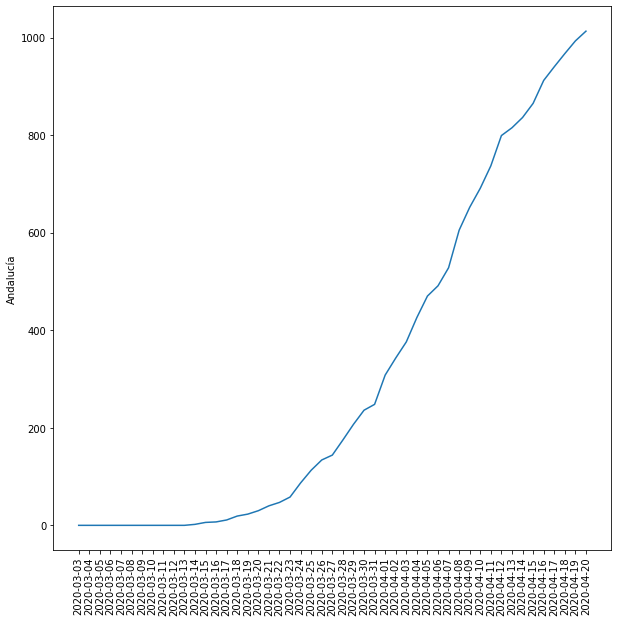

In [120]:
import seaborn as sns
import matplotlib.pylab as plt

fig = plt.figure(figsize=(10,10))
sns.lineplot(x=dt.index,y='Andalucía',data=dt)
plt.xticks(rotation='vertical')
plt.show()